## Data  개요

**소상공인시장진흥공단_상가(상권)정보**

- 영업 중인 전국 상가업소 데이터를 제공
- (상호명, 업종코드, 업종명, 지번주소, 도로명주소, 경도, 위도 등)

- 공공 데이터 포털 
https://www.data.go.kr/data/15083033/fileData.do

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)
pd.options.display.max_columns = 39

## Step 1: 질문하기 (Ask questions)
데이터가 주어진 상태에서 질문을 할 수도 있고, 질문에 답할 수 있는 데이터를 수집할 수도 있다.

**예시**

- (1) 서초구에는 어떤 음식점 업종이 많을까?
- (2) 구별 음식점 업종 분포는 어떻게 다를까?
- (3) 어느 구에 학원수가 많을까?
- (4) 구별 학원 분포는 어떻게 다를까?
- (5) 관심 동네 비교해보기

## Step 2: 데이터 랭글링 (Wrangle data)
- 데이터 랭글링 : 원자료(raw data)를 보다 쉽게 접근하고 분석할 수 있도록 데이터를 정리하고 통합하는 과정
(참고. 위키피디아)
- 세부적으로는 데이터의 수집(gather), 평가(assess), 정제(clean) 작업으로 나눌 수 있다.

### 2.1 수집(gather)

In [4]:
df=pd.read_csv('C:/Users/User/Desktop/코딩/JAY 연습장/eximg/소상공인시장진흥공단_상가(상권)정보_서울_202209.csv',sep=',')
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
상가업소번호,23324279,24525909,24715368,15554136,17174175,17174119,17174040,25530299,21938782,24590384
상호명,제중건강원,민속악기사,태평양진주,김선희꼼꼼국어교습소,비지트,쓰리에프,다향,고향생막걸리,무비디자인,우신타이어
지점명,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
상권업종대분류코드,D,D,D,R,Q,Q,Q,Q,R,D
상권업종대분류명,소매,소매,소매,학문/교육,음식,음식,음식,음식,학문/교육,소매
상권업종중분류코드,D10,D04,D26,R01,Q01,Q01,Q01,Q09,R02,D23
상권업종중분류명,건강/미용식품,취미/오락관련소매,시계/귀금속소매,학원-보습교습입시,한식,한식,한식,유흥주점,학원-창업취업취미,자동차/자동차용품
상권업종소분류코드,D10A07,D04A09,D26A01,R01A01,Q01A01,Q01A01,Q01A01,Q09A04,R02A12,D23A04
상권업종소분류명,건강원,악기판매,시계/귀금속,학원-입시,한식/백반/한정식,한식/백반/한정식,한식/백반/한정식,민속주점,학원-디자인,타이어판매
표준산업분류코드,G47216,G47593,G47830,P85501,I56111,I56111,I56111,I56219,P85659,G45211


### 2.2 평가(assess)

**샘플의 개수**, **컬럼의 개수**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361490 entries, 0 to 361489
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     361490 non-null  int64  
 1   상호명        361490 non-null  object 
 2   지점명        61624 non-null   object 
 3   상권업종대분류코드  361490 non-null  object 
 4   상권업종대분류명   361490 non-null  object 
 5   상권업종중분류코드  361490 non-null  object 
 6   상권업종중분류명   361490 non-null  object 
 7   상권업종소분류코드  361490 non-null  object 
 8   상권업종소분류명   361490 non-null  object 
 9   표준산업분류코드   336942 non-null  object 
 10  표준산업분류명    336942 non-null  object 
 11  시도코드       361490 non-null  int64  
 12  시도명        361490 non-null  object 
 13  시군구코드      361490 non-null  int64  
 14  시군구명       361490 non-null  object 
 15  행정동코드      361490 non-null  int64  
 16  행정동명       361490 non-null  object 
 17  법정동코드      361490 non-null  int64  
 18  법정동명       361490 non-null  object 
 19  지번코드       361490 non-n

**인덱스 정보 보기**

In [6]:
df.index

RangeIndex(start=0, stop=361490, step=1)

**컬럼 정보 보기**

In [7]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

**요약 정보 보기**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361490 entries, 0 to 361489
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     361490 non-null  int64  
 1   상호명        361490 non-null  object 
 2   지점명        61624 non-null   object 
 3   상권업종대분류코드  361490 non-null  object 
 4   상권업종대분류명   361490 non-null  object 
 5   상권업종중분류코드  361490 non-null  object 
 6   상권업종중분류명   361490 non-null  object 
 7   상권업종소분류코드  361490 non-null  object 
 8   상권업종소분류명   361490 non-null  object 
 9   표준산업분류코드   336942 non-null  object 
 10  표준산업분류명    336942 non-null  object 
 11  시도코드       361490 non-null  int64  
 12  시도명        361490 non-null  object 
 13  시군구코드      361490 non-null  int64  
 14  시군구명       361490 non-null  object 
 15  행정동코드      361490 non-null  int64  
 16  행정동명       361490 non-null  object 
 17  법정동코드      361490 non-null  int64  
 18  법정동명       361490 non-null  object 
 19  지번코드       361490 non-n

**누락 데이터 확인**

In [9]:
df.isnull().sum()

상가업소번호            0
상호명               0
지점명          299866
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      24548
표준산업분류명       24548
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         74907
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        313201
건물관리번호            0
건물명          182393
도로명주소             0
구우편번호             0
신우편번호             0
동정보          320442
층정보          140405
호정보          361490
경도                0
위도                0
dtype: int64

### 2.3 정제(clean)

**누락 데이터가 많은 컬럼 삭제**

In [10]:
df = df.drop(['지점명','표준산업분류코드','표준산업분류명','지번부번지','건물부번지','건물명','동정보','층정보','호정보'],axis=1)


In [11]:
df.isnull().sum()

상가업소번호       0
상호명          0
상권업종대분류코드    0
상권업종대분류명     0
상권업종중분류코드    0
상권업종중분류명     0
상권업종소분류코드    0
상권업종소분류명     0
시도코드         0
시도명          0
시군구코드        0
시군구명         0
행정동코드        0
행정동명         0
법정동코드        0
법정동명         0
지번코드         0
대지구분코드       0
대지구분명        0
지번본번지        0
지번주소         0
도로명코드        0
도로명          0
건물본번지        0
건물관리번호       0
도로명주소        0
구우편번호        0
신우편번호        0
경도           0
위도           0
dtype: int64

**컬럼명에 "코드" 또는 "번호"가 들어간 컬럼 삭제**

In [16]:
a=df.columns.str.contains('번호')
a

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
        True, False, False])

In [17]:
b=df.columns[a]
b

Index(['상가업소번호', '건물관리번호', '구우편번호', '신우편번호'], dtype='object')

In [21]:
df=df.drop(b,axis=1)
df

KeyError: "['상가업소번호', '건물관리번호', '구우편번호', '신우편번호'] not found in axis"

In [22]:
c=df.columns.str.contains('코드')
c

array([False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True,  True, False,
       False, False,  True, False, False, False, False, False])

In [23]:
d=df.columns[c]
d

Index(['상권업종대분류코드', '상권업종중분류코드', '상권업종소분류코드', '시도코드', '시군구코드', '행정동코드',
       '법정동코드', '지번코드', '대지구분코드', '도로명코드'],
      dtype='object')

In [24]:
df=df.drop(d,axis=1)

In [27]:
df.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,제중건강원,소매,건강/미용식품,건강원,서울특별시,영등포구,영등포동,영등포동5가,대지,41,서울특별시 영등포구 영등포동5가 41-1,서울특별시 영등포구 영중로14길,11,"서울특별시 영등포구 영중로14길 11-17, (영등포동5가)",126.907168,37.520613
1,민속악기사,소매,취미/오락관련소매,악기판매,서울특별시,성동구,용답동,용답동,대지,142,서울특별시 성동구 용답동 142-11,서울특별시 성동구 용답5길,2,"서울특별시 성동구 용답5길 2, (용답동)",127.049018,37.566857
2,태평양진주,소매,시계/귀금속소매,시계/귀금속,서울특별시,종로구,종로1.2.3.4가동,봉익동,대지,43,서울특별시 종로구 봉익동 43-1,서울특별시 종로구 서순라길,17,"서울특별시 종로구 서순라길 17-10, (봉익동)",126.993530,37.571848
3,김선희꼼꼼국어교습소,학문/교육,학원-보습교습입시,학원-입시,서울특별시,송파구,방이1동,방이동,대지,197,서울특별시 송파구 방이동 197-3,서울특별시 송파구 위례성대로12길,31,"서울특별시 송파구 위례성대로12길 31, (방이동)",127.121520,37.510967
4,비지트,음식,한식,한식/백반/한정식,서울특별시,서초구,방배4동,방배동,대지,854,서울특별시 서초구 방배동 854-18,서울특별시 서초구 동광로18길,82,"서울특별시 서초구 동광로18길 82, (방배동)",126.991394,37.488375


## Step 3: 데이터 탐색 (Exploratory Data Analysis)
데이터의 패턴을 찾고, 관계를 시각화 하는 작업 등으로 통해 데이터에 대한 직관을 극대화 한다.

**기술 통계 요약**

In [28]:
df.describe()

,지번본번지,건물본번지,경도,위도
count,361490.000000,361490.000000,361490.000000,361490.000000
mean,422.386384,139.732366,126.993759,37.544906
std,426.373510,259.077055,0.083937,0.049022
min,1.000000,1.000000,126.768169,37.434081
25%,102.000000,19.000000,126.922367,37.504588
50%,301.000000,46.000000,127.009557,37.542195
75%,644.000000,154.000000,127.056107,37.572518
max,9999.000000,3581.000000,127.182588,37.690787


In [29]:
df.describe(include="object")

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,도로명주소
count,361490,361490,361490,361490,361490,361490,361490,361490,361490,361490,361490,361490
unique,263524,8,89,677,1,25,425,463,2,134165,12408,133359
top,CU,음식,한식,한식/백반/한정식,서울특별시,강남구,역삼1동,역삼동,대지,서울특별시 종로구 종로6가 262-1,서울특별시 종로구 종로,"서울특별시 종로구 종로 266, (종로6가)"
freq,1702,121534,39624,29155,361490,35511,6628,8292,361232,892,2263,898


### 3.1 히스토그램으로 수치 데이터의 분포 한눈에 확인하기
- **히스토그램(histogram)** : 수치형 데이터의 구간별 빈도수를 나타내는 그래프

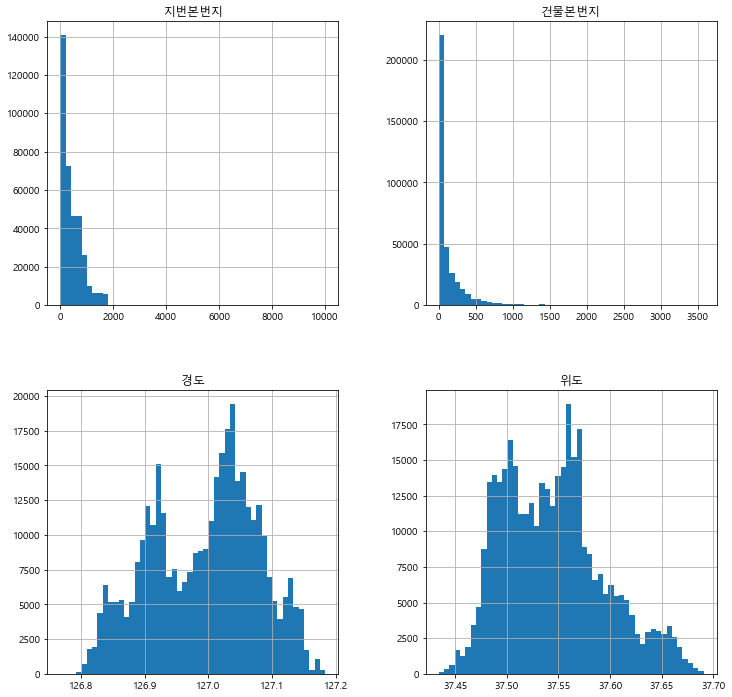

In [30]:
his = df.hist(figsize=(12, 12), bins=50)

### 3.2 상관 계수로 두 변량간의 관계 파악하기

In [32]:
corr = df.corr()
corr

,지번본번지,건물본번지,경도,위도
지번본번지,1.000000,0.079527,-0.143662,-0.215020
건물본번지,0.079527,1.000000,0.061893,-0.005848
경도,-0.143662,0.061893,1.000000,0.155010
위도,-0.215020,-0.005848,0.155010,1.000000


<AxesSubplot:>

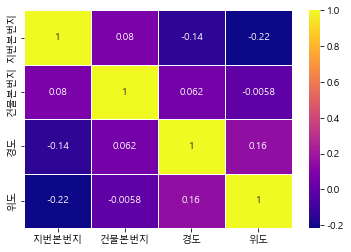

In [34]:
sns.heatmap(corr, annot=True, linewidths=0.5, cmap='plasma')

* [컬러맵 정보](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

### 3.3 문자열 데이터에 대한 요약

- 상권업종대분류명 요약

In [35]:
df["상권업종대분류명"].describe()

count     361490
unique         8
top           음식
freq      121534
Name: 상권업종대분류명, dtype: object

- 상권업종대분류명 의 unique 값

In [36]:
df["상권업종대분류명"].unique()

array(['소매', '학문/교육', '음식', '부동산', '생활서비스', '관광/여가/오락', '숙박', '스포츠'],
      dtype=object)

- 상권업종대분류명 의 unique 값의 갯수

In [37]:
df["상권업종대분류명"].nunique()

8

- 상권업종대분류명 의 최빈값

In [38]:
df["상권업종대분류명"].mode()

0    음식
Name: 상권업종대분류명, dtype: object

- 상권업종대분류명 의 빈도수

In [39]:
df["상권업종대분류명"].value_counts()

음식          121534
소매          103889
생활서비스        74450
학문/교육        26193
부동산          18600
관광/여가/오락      9167
스포츠           5290
숙박            2367
Name: 상권업종대분류명, dtype: int64

### 3.4 구별 음식점 업종 비교하기

#### (1) 서초구에는 어떤 음식점 업종이 많을까?

- 서초구에서 상권업종대분류명이 음식인 데이터만 가져오기

In [47]:
seocho_food = df[(df["시군구명"] == "영등포구") & (df["상권업종대분류명"] == "음식")].copy()
seocho_food.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
357,만복국수,음식,분식,국수/만두/칼국수,서울특별시,영등포구,여의동,여의도동,대지,37,서울특별시 영등포구 여의도동 37,서울특별시 영등포구 의사당대로,110,"서울특별시 영등포구 의사당대로 110, (여의도동, 미성)",126.924414,37.520203
629,샤이닝스톤,음식,부페,종합부페,서울특별시,영등포구,여의동,여의도동,대지,16,서울특별시 영등포구 여의도동 16-2,서울특별시 영등포구 은행로,30,"서울특별시 영등포구 은행로 30, (여의도동)",126.922636,37.528188
632,뒤풀이,음식,한식,한식/백반/한정식,서울특별시,영등포구,여의동,여의도동,대지,13,서울특별시 영등포구 여의도동 13-25,서울특별시 영등포구 은행로,29,"서울특별시 영등포구 은행로 29, (여의도동)",126.921877,37.529074
858,금석당여의도,음식,한식,한식/백반/한정식,서울특별시,영등포구,여의동,여의도동,대지,44,서울특별시 영등포구 여의도동 44-4,서울특별시 영등포구 여의대방로67길,22,"서울특별시 영등포구 여의대방로67길 22, (여의도동)",126.929984,37.520695
878,깡장양곱창,음식,한식,한식/백반/한정식,서울특별시,영등포구,여의동,여의도동,대지,36,서울특별시 영등포구 여의도동 36-2,서울특별시 영등포구 국제금융로6길,33,"서울특별시 영등포구 국제금융로6길 33, (여의도동)",126.926894,37.520785


In [48]:
seocho_food["상권업종중분류명"].value_counts()

한식         1768
커피점/카페      969
유흥주점        593
분식          400
일식/수산물      391
중식          292
양식          259
패스트푸드       253
닭/오리요리      215
제과제빵떡케익     201
별식/퓨전요리     125
부페           33
기타음식업        24
음식배달서비스       3
Name: 상권업종중분류명, dtype: int64

**분석결과** : 영등포구에는 한식점과 카페가 제일 많다!!

#### (2) 구별 업종(상권업종중분류명 기준)  분포 비교하기

- 상권업종대분류명 이 음식인 데이터 준비

In [50]:
df_food = df[(df["상권업종대분류명"] == "음식")].copy()
df_food.shape

(121534, 16)

- 시군구명, 상권업종중분류명 으로 그룹화 해서 상점수 개수 구하기

In [51]:
food_groupby = df_food.groupby(["시군구명", "상권업종중분류명"])["상호명"].count()
food_groupby

시군구명  상권업종중분류명
강남구   기타음식업         49
      닭/오리요리       340
      별식/퓨전요리      224
      부페            47
      분식           751
                  ... 
중랑구   제과제빵떡케익      180
      중식            80
      커피점/카페       511
      패스트푸드        178
      한식          1247
Name: 상호명, Length: 348, dtype: int64

In [52]:
food = food_groupby.reset_index()
food = food.rename(columns={"상호명":"상호수"})
food

,시군구명,상권업종중분류명,상호수
0,강남구,기타음식업,49
1,강남구,닭/오리요리,340
2,강남구,별식/퓨전요리,224
3,강남구,부페,47
4,강남구,분식,751
...,...,...,...
343,중랑구,제과제빵떡케익,180
344,중랑구,중식,80
345,중랑구,커피점/카페,511
346,중랑구,패스트푸드,178


- 전체 업종별 평균 시각화하기

<AxesSubplot:xlabel='상권업종중분류명', ylabel='상호수'>

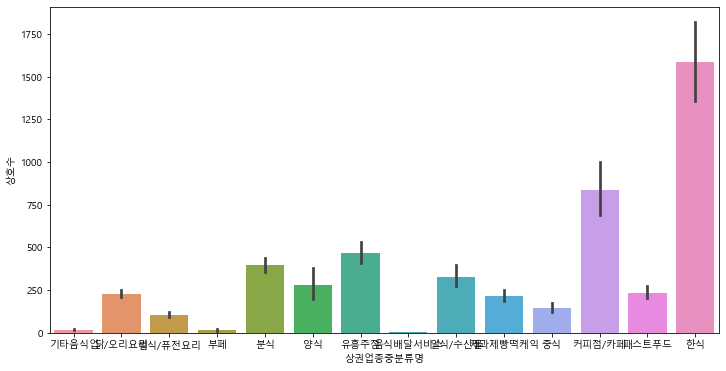

In [53]:
plt.figure(figsize=(12, 6))
sns.barplot(data=food, x="상권업종중분류명", y="상호수")

- 상권업종중분류명에 따른 상호수를 시각화하되 시군구명별로 모두 표시 (sns.catplot 이용)

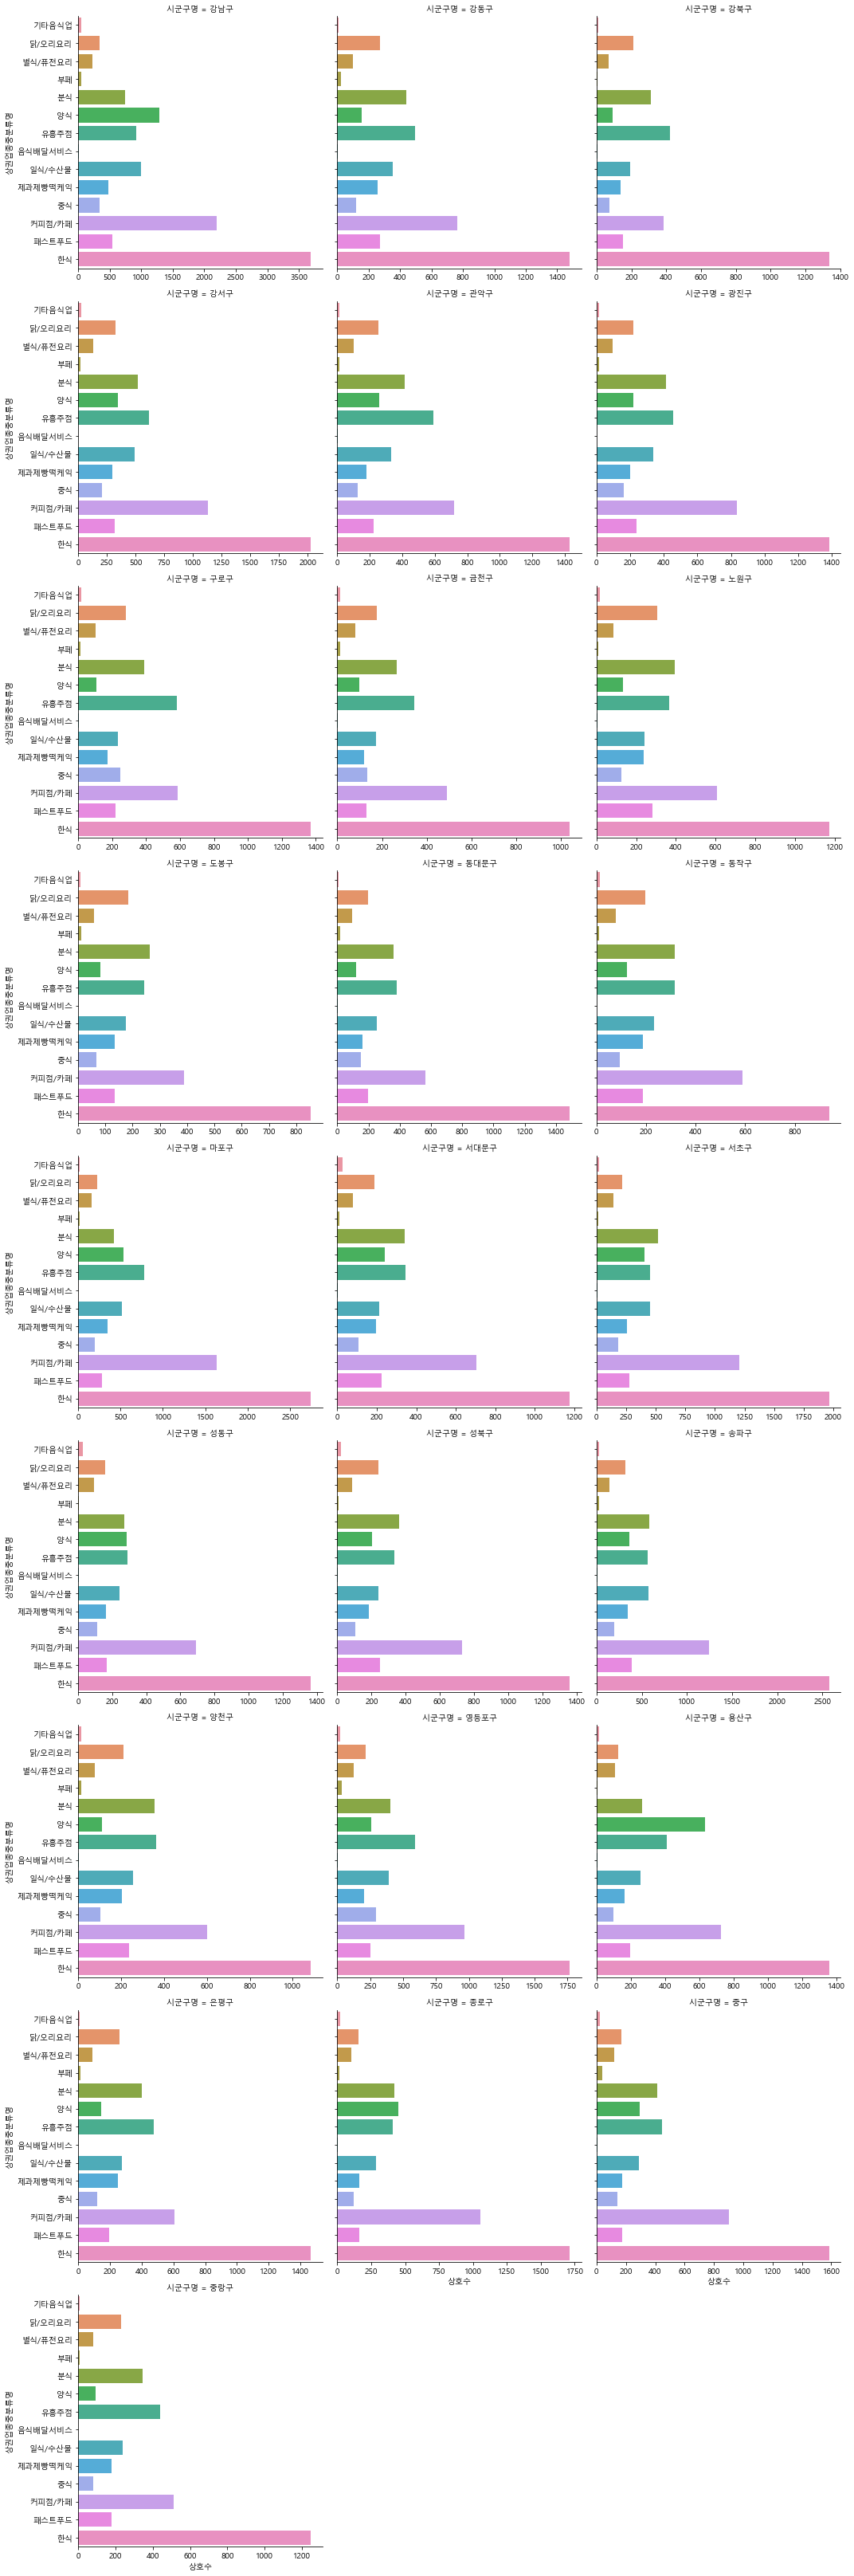

In [54]:
sns.catplot(data=food, y="상권업종중분류명", x="상호수",
            col='시군구명', kind='bar', col_wrap=3, sharex=False)

**분석결과** : 어디를 가든 한식집이 제일 많다 !!

### 3.5 구별 학원수 비교하기

#### (1) 어느 구에 학원수가 많을까?

- 상권업종대분류명의 unique 값

- 상권업종대분류명이 학문/교육인 데이터 가져오기

- 시군구명으로 빈도수 구하기

- 빈도수 시각화하기

**분석 결과** :

#### (2) 구별 학원의 세부 업종 (상권업종소분류명 기준) 분포 비교하기

- 상권업종소분류명으로 빈도수를 구하기

- 상권업종소분류명 빈도수 기준 상위 4개만 가져오기

- 위에서 구한 상위 4개 업종으로만 데이터 가져오기

- 상권업종소분류명, 시군구명으로 그룹화를 해서 빈도수 구하기

#### (3) 위치 정보 시각화하기

- 위에서 구한 데이터를 구별로 시각화

- 학원-입시 업종만 시각화

- 강남구에 대해서만 시각화

- 관심 동네 비교해보기